<a href="https://colab.research.google.com/github/D-2000-99/Acoustic_Woods/blob/main/PSO_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Particle Swarm Optimizer(PSO) - Minimization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

#Function definitions

In [ ]:
def getUpperLowerBound():
  ub1 = int(input("Enter 1st Upper Bound value: "))
  ub2 = int(input("Enter 2nd Upper Bound value: "))
  lb1 = int(input("Enter 1st Lower Bound value: "))
  lb2 = int(input("Enter 2nd Lower Bound value: "))
  ub = np.array([ub1,ub2])
  lb = np.array([lb1,lb2])
  return(ub,lb)

In [ ]:
def constraintCalc(constList):
  nConst = int(input("Number of Constraints: "))
  for i in range(nConst):
    const = input(f'Constraint {i}: ')
    constList.append(const)
  return constList

In [ ]:
def objCalc(x, x1, x2, obj):
  #return np.sum(np.square(x))
  #return 1 * (x1 + x2)
  return eval(obj)

In [ ]:
def ObjectiveFunction(x_inp,constList,obj):
  x = x_inp[0]
  x1 = x[0]
  x2 = x[1]
  feasibleList=[]
  #Constraints
  for i in constList:
    feasibleList.append(eval(i))
    #Example constraints
      # const1 = (x2<=3.2) or (x2>=6.4)
      # const2 = (x1**2+x2**2) >= 1
      # const4 = (2*((x1-2)**2)+(x2+4)**2) >= 2
      # const3 = x1 != x2

  #Objective Function - Minimization
  ofunc = objCalc(x, x1, x2, obj)

  if all(feasibleList):
    #o=sum(x.^2)
    o = ofunc
  else:
    #Solution not feasible(Infeasible)
    #o=sum(x^2)+200
    o = ofunc +200
  return o

In [ ]:
nVar = 2
#fobj
wMax = 0.9
wMin = 0.2
c1 = 2
c2 = 2
#Forplots
cgCurve = []
wCurve = []
xCurve = []

#Inputs

##Example Inputs:
###Eg.1
    Number of Constraints: 0
    Input Minimization Objective: 1 * (x1 + x2)
    Enter 1st Upper Bound value: 7
    Enter 2nd Upper Bound value: 7
    Enter 1st Lower Bound value: 2
    Enter 2nd Lower Bound value: 2
    Specify number of particles: 5
    Specify number of Iterations: 10

###Eg.2
    Number of Constraints: 4
    Constraint 0: (x2<=3.2) or (x2>=6.4)
    Constraint 1: (x1**2+x2**2) >= 1
    Constraint 2: (2*((x1-2)**2)+(x2+4)**2) >= 2
    Constraint 3: x1 != x2
    Input Minimization Objective: np.sum(np.square(x))
    Enter 1st Upper Bound value: 10
    Enter 2nd Upper Bound value: 10
    Enter 1st Lower Bound value: -10
    Enter 2nd Lower Bound value: -10
    Specify number of particles: 10
    Specify number of Iterations: 30

###Eg. 3 
    Number of Constraints: 0
    Input Minimization Objective: np.cos(np.sin(x1)+np.sin(x2))
    Enter 1st Upper Bound value: 10
    Enter 2nd Upper Bound value: 10
    Enter 1st Lower Bound value: 4
    Enter 2nd Lower Bound value: 4
    Specify number of particles: 10
    Specify number of Iterations: 30



In [ ]:
currentX = []
constList = []
print("Number of constraints can range from 0-n, used to add a number of constraints to restrict the feasible region. ")
constList = constraintCalc(constList)
print("Specify minimization objective as f(z) with two variables x1 and x2; np notation must be used for certain operations(eg.<< np.power(x1,3) >>)")
obj = input("Input Minimization Objective: ")
print("Specify the upper and lower bound values of the feasible region")
[ub, lb] = getUpperLowerBound()
print("The number of randomly initialized particles. Higher values will lead to more accuracy but will be computationally expensive")
nOP = int(input("Specify number of particles: "))
print("The number of iterations to perform descent. Higher values will lead to more accuracy but will be computationally expensive")
maxIter = int(input("Specify number of Iterations: "))
print(ub,lb)
vMax = (ub-lb)*0.2
vMin = -vMax

Number of constraints can range from 0-n, used to add a number of constraints to restrict the feasible region. 
Number of Constraints: 1
Constraint 0: (5*x1**2+6*x2**2) >= 2
Specify minimization objective as f(z) with two variables x1 and x2; np notation must be used for certain operations(eg.<< np.power(x1,3) >>)
Input Minimization Objective: np.cos(np.sin(x1)+np.sin(x2))
Specify the upper and lower bound values of the feasible region
Enter 1st Upper Bound value: 10
Enter 2nd Upper Bound value: 10
Enter 1st Lower Bound value: 4
Enter 2nd Lower Bound value: 4
The number of randomly initialized particles. Higher values will lead to more accuracy but will be computationally expensive
Specify number of particles: 10
The number of iterations to perform descent. Higher values will lead to more accuracy but will be computationally expensive
Specify number of Iterations: 20
[10 10] [4 4]


In [ ]:
1#Swarm = {Particles: {X:,V:,PBEST:{X:,O:}},GBEST:{X:, O:}}
Swarm = {"Particles": [],"GBEST":{"X": np.zeros((1, nVar)), "O": np.inf}}

In [ ]:
for k in range(nOP):
  X = (ub-lb)*np.random.rand(1,nVar)+lb
  V = np.zeros((1, nVar))
  PBEST_X = np.zeros((1, nVar))
  PBEST_O = np.inf
  Swarm["Particles"].append({"X": X,"V":V,"O": np.inf,"PBEST":{"X": PBEST_X,"O": PBEST_O}})
  xCurve.append([])

#Main Code

In [ ]:
for t in range(maxIter):
  for k in range(nOP):
    for n in range(nVar):
      if Swarm["Particles"][k]["X"][0][n]>ub[n]:
          Swarm["Particles"][k]["X"][0][n] = ub[n]
      if Swarm["Particles"][k]["X"][0][n]<lb[n]:
          Swarm["Particles"][k]["X"][0][n] = lb[n]

    currentX = Swarm["Particles"][k]["X"]
    Swarm["Particles"][k]["O"] = ObjectiveFunction(currentX, constList, obj)

    #Personal Best
    if Swarm["Particles"][k]["O"] < Swarm["Particles"][k]["PBEST"]["O"]:
      Swarm["Particles"][k]["PBEST"]["X"] = currentX
      Swarm["Particles"][k]["PBEST"]["O"] = Swarm["Particles"][k]["O"]
    #Global Best
    if Swarm["Particles"][k]["O"] < Swarm["GBEST"]["O"]:
      Swarm["GBEST"]["X"] = currentX
      Swarm["GBEST"]["O"] = Swarm["Particles"][k]["O"]
  
  w = wMax-t*((wMax - wMin)/maxIter)#Decrease linearly with time

  #Update X and V vectors
  for k in range(nOP):
    Swarm["Particles"][k]["V"] = w*Swarm["Particles"][k]["V"]+c1*np.random.rand(1,nVar)*(Swarm["Particles"][k]["PBEST"]["X"] - Swarm["Particles"][k]["X"])+c2*np.random.rand(1,nVar)*(Swarm["GBEST"]["X"] - Swarm["Particles"][k]["X"])

    for n in range(nVar):#Basically linear time, Can be changed to not use loop
      if Swarm["Particles"][k]["V"][0][n]>vMax[n]:
        Swarm["Particles"][k]["V"][0][n] = vMax[n]
      if Swarm["Particles"][k]["V"][0][n]<vMin[n]:
        Swarm["Particles"][k]["V"][0][n] = vMin[n]
      ######
    Swarm["Particles"][k]["X"] = Swarm["Particles"][k]["X"] + Swarm["Particles"][k]["V"]
      
    xCurve[k].append(Swarm["Particles"][k]["X"])
  print("Iteration#",t,", Swarm[GBEST][O] = ",Swarm["GBEST"]["O"])
  cgCurve.append(Swarm["GBEST"]["O"])
  wCurve.append(w)

Iteration# 0 , Swarm[GBEST][O] =  -0.24357066111475084
Iteration# 1 , Swarm[GBEST][O] =  -0.24357066111475084
Iteration# 2 , Swarm[GBEST][O] =  -0.30432110051231753
Iteration# 3 , Swarm[GBEST][O] =  -0.39386850017234887
Iteration# 4 , Swarm[GBEST][O] =  -0.39386850017234887
Iteration# 5 , Swarm[GBEST][O] =  -0.39386850017234887
Iteration# 6 , Swarm[GBEST][O] =  -0.407842510015116
Iteration# 7 , Swarm[GBEST][O] =  -0.407842510015116
Iteration# 8 , Swarm[GBEST][O] =  -0.407842510015116
Iteration# 9 , Swarm[GBEST][O] =  -0.4153064215745468
Iteration# 10 , Swarm[GBEST][O] =  -0.4153064215745468
Iteration# 11 , Swarm[GBEST][O] =  -0.4153064215745468
Iteration# 12 , Swarm[GBEST][O] =  -0.4153064215745468
Iteration# 13 , Swarm[GBEST][O] =  -0.4153064215745468
Iteration# 14 , Swarm[GBEST][O] =  -0.41530970677460477
Iteration# 15 , Swarm[GBEST][O] =  -0.4154287923384482
Iteration# 16 , Swarm[GBEST][O] =  -0.4154287923384482
Iteration# 17 , Swarm[GBEST][O] =  -0.41600588632379676
Iteration# 18 ,

In [ ]:
print(Swarm["Particles"][0]["X"][0])
print(Swarm["Particles"][0]["V"][0])

[4.70378473 4.64662836]
[-0.12583847 -0.15077195]


In [ ]:
x_draw = np.linspace(lb[0],ub[1],300)
y_draw = np.linspace(ub[0],lb[1],300)
[x_new, y_new] = np.meshgrid(x_draw,y_draw)

In [ ]:
o=np.zeros((x_new.shape[0],x_new.shape[1]))
for i in range(x_new.shape[0]):
  for j in range(x_new.shape[1]):
    currX = [x_new[i][j], y_new[i][j]]
    o[i][j] = ObjectiveFunction([currX],constList,obj)

#Global Minimum:

In [ ]:
print("The minimum feasible value of z is approximately: ", round(Swarm["GBEST"]["O"],3))
print("The values x1 and x2 values are approximately: ", round(Swarm["Particles"][0]["X"][0][0],1), ",", round(Swarm["Particles"][0]["X"][0][1],1))

The minimum feasible value of z is approximately:  -0.416
The values x1 and x2 values are approximately:  4.7 , 4.6


#Plots

##Convergence Plot

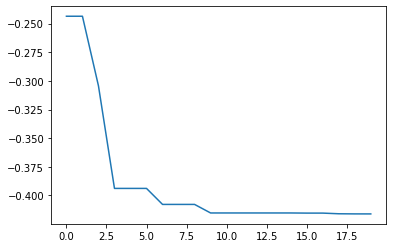

In [ ]:
plt.plot(cgCurve)

##Search Landscape

###Search Landscape - Contour plot

In [ ]:
fig = go.Figure(data=[go.Contour(z=o, x=x_draw,y=y_draw)])
fig.update_layout(title='Search Landscape - Contour', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

###Search Landscape - 3D plot

In [ ]:
fig = go.Figure(data=[go.Surface(z=o, x=x_new, y=y_new)])
fig.update_layout(title='Search Landscape', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

##Initial random positions of particles

In [ ]:
colors= []

for i in range(nOP):
  c=[0,0,0]
  c[0]=np.random.rand()
  c[1]=np.random.rand()
  c[2]=np.random.rand()
  colors.append(c)

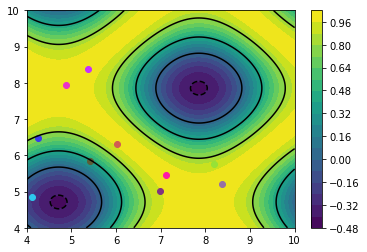

In [ ]:
#PLOT FINAL
fig = plt.figure()
plt.contourf(x_new, y_new, o, 20, cmap='viridis');
plt.colorbar();
contour = plt.contour(x_new, y_new, o, 3, colors='black');

for k in range(nOP):
  plt.scatter(xCurve[k][0][0][0], xCurve[k][0][0][1], color=colors[k])

##Traversal of landscape by particles
The path taken by the particle is plotted where each color represents a specific particle in the landscape.

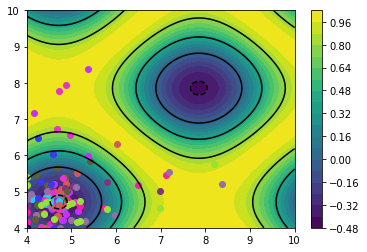

In [ ]:
#PLOT FINAL
fig = plt.figure()
plt.contourf(x_new, y_new, o, 20, cmap='viridis');
plt.colorbar();
contour = plt.contour(x_new, y_new, o, 3, colors='black');

p= []
for i in range(maxIter):
  for k in range(nOP):
    plt.scatter(xCurve[k][i][0][0], xCurve[k][i][0][1], color=colors[k])